# Carrying Capacity Simulation by ODE

## Population Dynamics 간단 소개
이번에 주로 다룰 Carrying Capacity(이하 CC)라는 개념은 인구 생태학 분야의 용어로, 이 의미를 잘 이해하기 위해서는 원래 해결하려던 문제가 무엇인지를 잘 이해할 필요가 있다. 인구 생태학에서 중요하게 다루는 문제 중의 하나는 바로 인구 수의 변화를 예측하는 것, 즉 population dynamics이다.

인구 수의 변화를 예측하는 방식에는 다양한 방식이 있겠지만 기본적으로는 미분방정식의 형태로 모델링한다. 미분방정식이란 시간에 따른 인구 수를 $N(t)$ 이라고 하자. 인구 수의 변화량은 이를 미분한 $\frac{dN}{dt}$ 일 것이고 이를 어떤 수식으로 표현하면 자연스럽게 인구 수를 시간에 대한 함수로 시뮬레이션할 수 있다. 

# What is Growth Rate ($r$)
가장 기초적인 단계의 population dynamics 모델링 식은 다음과 같다. 일정한 출산율/사망율을 가질 것이라는 가정 하에서 변화하는 인구 수를 나타내는 것이다. 이를 위해 출산율과 사망율을 모두 감안한 인구 성장률(growth rate) $r$을 도입할 수 있다. 예를 들어 전체 인구 중에서 매년 1%가 감소하고 5%가 증가한다면 최종 인구 성장률은 4%가 될 것이다. 미분방정식으로 나타내면 다음과 같다.

$$
\frac{dN}{dt} = rN
$$

r이 양수일 경우, 인구 수는 계속 증가할 것이고, 음수일 경우 감소할 것이다. 단순한 형태의 미분방정식이라 바로 손으로 푸는 것도 가능하다.

$$
N = N_0 e^{rt}
$$

여기서 $N_0$는 초기 인구 수이다. 이렇게 최종 솔루션이 지수 함수 형태기 때문에 이를 지수 성장 모델(exponential growth model)이라고 한다. 이 모델은 인구 수가 지속적으로 증가(or 감소)하는 가정이기 때문에 현실적이지는 않다. 아래는 이 모델을 시뮬레이션하는 코드이다.

In [1]:
import numpy as np
import scipy.integrate
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

## 매뉴얼하게 numpy만으로 지수 성장 모델 시뮬레이션하기

In [37]:
# ODE manual
time_size = 20
times = np.arange(0, time_size)

def dNdt(t, N, r):
    return r * N

N_0 = 2e5
r = 0.001

N_t = np.zeros_like(times).astype(np.float64)
N_t[0] = N_0

dN_seq = np.zeros_like(times[:-1]).astype(np.float64)

for idx, t in enumerate(times[:-1]):
    print(f"t {t}:", "N", N_t[idx], "dN", r * N_t[idx])
    print()
    dN_seq[idx] = dNdt(t, N_t[idx], r)
    N_t[idx + 1] = N_t[idx] + dN_seq[idx]

t 0: N 200000.0 dN 200.0

t 1: N 200200.0 dN 200.20000000000002

t 2: N 200400.2 dN 200.4002

t 3: N 200600.60020000002 dN 200.60060020000003

t 4: N 200801.20080020002 dN 200.80120080020004

t 5: N 201002.00200100022 dN 201.00200200100022

t 6: N 201203.00400300123 dN 201.20300400300124

t 7: N 201404.20700700424 dN 201.40420700700423

t 8: N 201605.61121401124 dN 201.60561121401125

t 9: N 201807.21682522524 dN 201.80721682522525

t 10: N 202009.02404205047 dN 202.00902404205047

t 11: N 202211.03306609252 dN 202.21103306609254

t 12: N 202413.24409915862 dN 202.41324409915862

t 13: N 202615.65734325777 dN 202.61565734325777

t 14: N 202818.27300060104 dN 202.81827300060104

t 15: N 203021.09127360163 dN 203.02109127360163

t 16: N 203224.11236487524 dN 203.22411236487525

t 17: N 203427.3364772401 dN 203.42733647724012

t 18: N 203630.76381371735 dN 203.63076381371735



## scipy.integrate.solve_ivp()로 구현된 메서드 활용하기

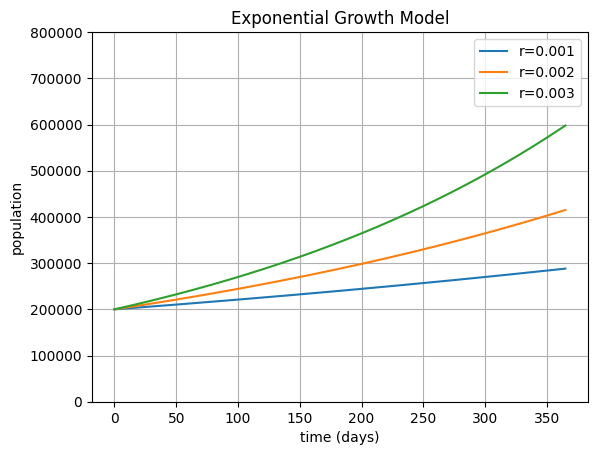

In [39]:
# CASE 1: Exponential Growth
def exp_growth_model(t, N, r):
    dNdt = r * N
    return dNdt


# Time Mesh
end_time = 365 + 1
times = np.arange(0, end_time)

# r값에 따른 시뮬레이션 plotting
N_0 = 200_000  # initial population
for r in [0.001, 0.002, 0.003]:
    sol = scipy.integrate.solve_ivp(
        exp_growth_model, 
        t_span=(times[0], times[-1]), 
        y0=[N_0],
        args=(r,), 
        t_eval=times
    )
    
    ax = sns.lineplot(x=sol.t, y=sol.y[0], label=f"r={r}")
    ax.set_title("Exponential Growth Model")
    ax.set_xlabel("time (days)")
    ax.set_ylabel("population")
    ax.set_ylim(0, 8e5)
plt.grid()
plt.show()

# What is Carrying Capacity ($K$)

Carrying Capacity(이하 CC)란 어떤 환경이 인구 수를 어느 정도까지 수용할 수 있느냐에 대한 능력치를 나타내는 수치다. 즉, CC가 100만이면 그 환경은 100만의 인구를 수용할 수 있는 환경이라는 뜻이다. 만약 현재 인구 수가 CC보다 크다면 감소하고, CC보다 작다면 증가하면서 CC에 맞춰간다.

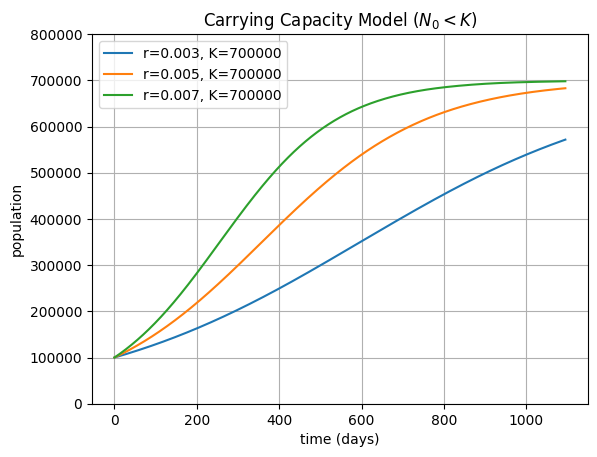

In [42]:
def carrying_capacity_model(t, N, r, K):
    dNdt = r * N - r / K * N ** 2
    return dNdt

# CASE 1: N_0 < K

# Time Mesh
end_time = 365 * 3 + 1
times = np.arange(0, end_time)

N_0 = 100_000  # initial population
K = 700_000  # 50만 vs 70만

for r in [0.003, 0.005, 0.007]:
    sol = scipy.integrate.solve_ivp(
        carrying_capacity_model, 
        t_span=(times[0], times[-1]), 
        y0=[N_0],
        args=(r, K), 
        t_eval=times
    )
    
    ax = sns.lineplot(x=sol.t, y=sol.y[0], label=f"r={r}, K={K}")
    ax.set_title("Carrying Capacity Model ($N_0 < K$)")
    ax.set_xlabel("time (days)")
    ax.set_ylabel("population")
    ax.set_ylim(0, 8e5)

plt.grid()
plt.show()

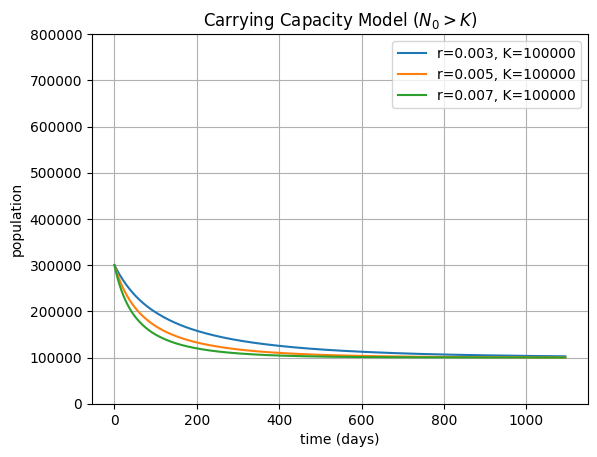

In [44]:
# CASE 2: N_0 > K

# Time Mesh
end_time = 365 * 3 + 1
times = np.arange(0, end_time)

N_0 = 300_000  # initial population
K = 100_000  # 50만 vs 70만

for r in [0.003, 0.005, 0.007]:
    sol = scipy.integrate.solve_ivp(
        carrying_capacity_model, 
        t_span=(times[0], times[-1]), 
        y0=[N_0],
        args=(r, K), 
        t_eval=times
    )
    
    ax = sns.lineplot(x=sol.t, y=sol.y[0], label=f"r={r}, K={K}")
    ax.set_title("Carrying Capacity Model ($N_0 > K$)")
    ax.set_xlabel("time (days)")
    ax.set_ylabel("population")
    ax.set_ylim(0, 8e5)

plt.grid()
plt.show()

# 그 외의 단순한 모델

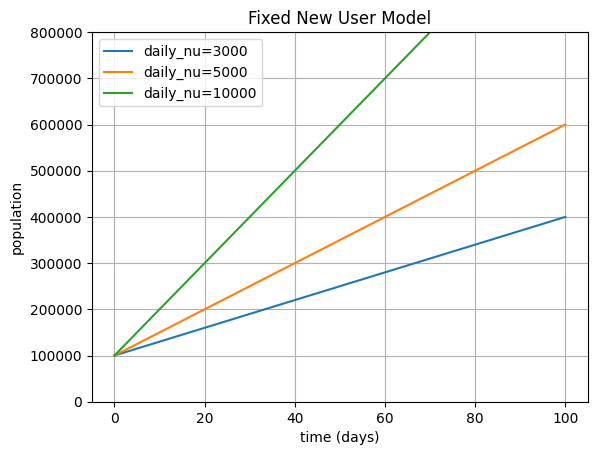

In [40]:
def fixed_daily_nu_model(t, N, dN):
    return dN

end_time = 100 + 1
times = np.arange(0, end_time)
N_0 = 100_000  # initial population
dN = 10_000  

for dN in [3_000, 5_000, 10_000]:
    sol = scipy.integrate.solve_ivp(
        fixed_daily_nu_model, 
        t_span=(times[0], times[-1]), 
        y0=[N_0],
        args=(dN,), 
        t_eval=times
    )
    
    ax = sns.lineplot(x=sol.t, y=sol.y[0], label=f"daily_nu={dN}")
    ax.set_title("Fixed New User Model")
    ax.set_xlabel("time (days)")
    ax.set_ylabel("population")
    ax.set_ylim(0, 8e5)

plt.grid()

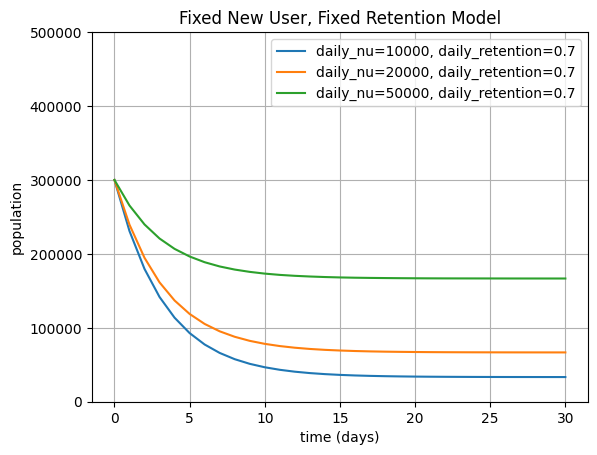

In [41]:
def fixed_daily_nu_and_fixed_retention_model(t, N, dN, ret):
    dNdt = dN - (1 - ret) * N
    return dNdt

end_time = 30 + 1
times = np.arange(0, end_time)
N_0 = 300_000  # initial population
ret = 0.7

for dN in [10_000, 20_000, 50_000]:
    sol = scipy.integrate.solve_ivp(
        fixed_daily_nu_and_fixed_retention_model, 
        t_span=(times[0], times[-1]), 
        y0=[N_0],
        args=(dN, ret), 
        t_eval=times
    )
    
    ax = sns.lineplot(x=sol.t, y=sol.y[0], label=f"daily_nu={dN}, daily_retention={ret}")
    ax.set_title("Fixed New User, Fixed Retention Model")
    ax.set_xlabel("time (days)")
    ax.set_ylabel("population")
    ax.set_ylim(0, 5e5)

plt.grid()